In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Project\data nyc fare data\cab_rides.csv")
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [3]:
df.shape

(693071, 10)

In [4]:
df.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [5]:
df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [6]:
(df.isnull().sum()/df.shape[0])*100

distance            0.000000
cab_type            0.000000
time_stamp          0.000000
destination         0.000000
source              0.000000
price               7.949402
surge_multiplier    0.000000
id                  0.000000
product_id          0.000000
name                0.000000
dtype: float64

In [7]:
print(df.shape)
df.dropna(subset=['price'],inplace=True)
print(df.shape)

(693071, 10)
(637976, 10)


In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df.describe(include=['object', 'category'])

,cab_type,destination,source,id,product_id,name
count,637976,637976,637976,637976,637976,637976
unique,2,12,12,637976,12,12
top,Uber,Financial District,Financial District,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
freq,330568,54192,54197,1,55096,55096


### 1. Distance column

In [10]:
df['distance'].describe()

count    637976.000000
mean          2.189261
std           1.135413
min           0.020000
25%           1.270000
50%           2.160000
75%           2.930000
max           7.860000
Name: distance, dtype: float64

In [11]:

def percentile_column(x):
    percentile_25 = np.percentile(x,25)
    percentile_50 = np.percentile(x,50)
    percentile_75 = np.percentile(x,75)
    
    IQR = (percentile_75 - percentile_25)
    lower_range = percentile_25 - (3 * IQR)
    higher_range = percentile_75 + (3 * IQR)
    
    print(f"lower range : {lower_range}, 25 percetile : {percentile_25}, 50th percentile = {percentile_50}, 75th percentile : {percentile_75}, higher range : {higher_range}")
    
    return lower_range, higher_range

In [12]:
percentile_column(df['distance'])

lower range : -3.7100000000000004, 25 percetile : 1.27, 50th percentile = 2.16, 75th percentile : 2.93, higher range : 7.91


(np.float64(-3.7100000000000004), np.float64(7.91))

<Axes: xlabel='distance', ylabel='Count'>

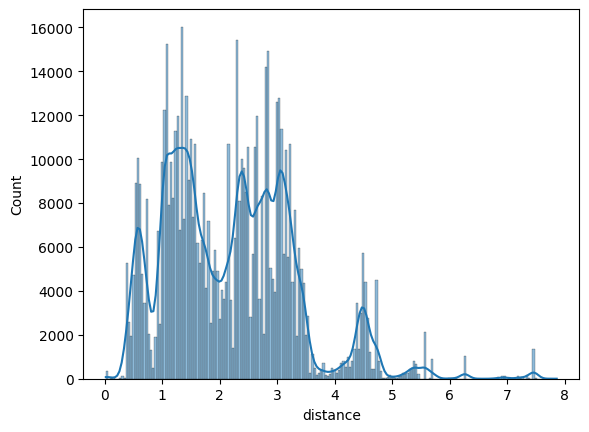

In [13]:
sns.histplot(data=df,x=df['distance'],kde=True)

<Axes: xlabel='distance'>

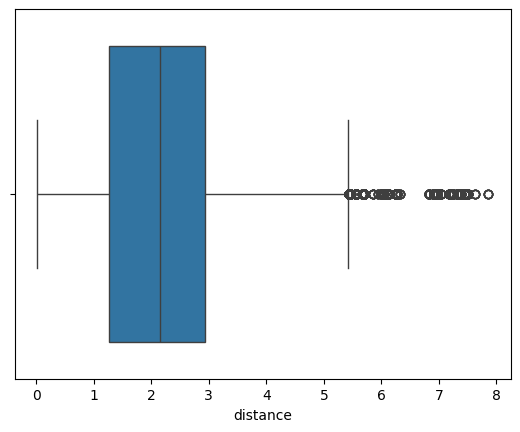

In [14]:
sns.boxplot(data=df,x='distance')

In [15]:
df['distance'].skew()

np.float64(0.8168484903389348)

<Axes: ylabel='distance'>

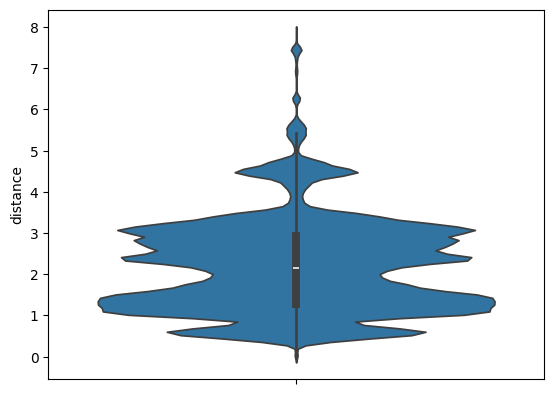

In [16]:
sns.violinplot(df['distance'])

<Axes: xlabel='distance', ylabel='price'>

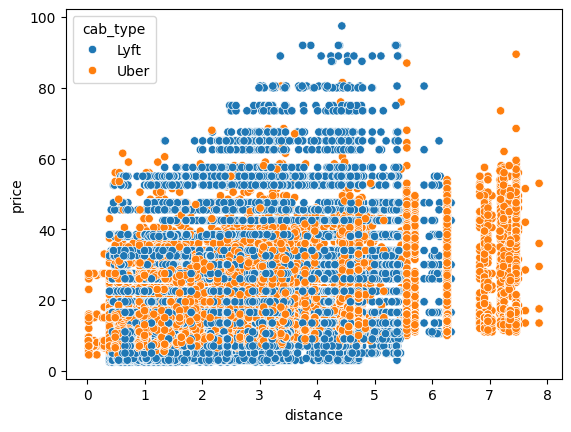

In [17]:
sns.scatterplot(data=df,x='distance',y='price',hue='cab_type')

In [18]:
mean_distance =df['distance'].mean()
std_distance = df['distance'].std()



### 2. cab type

In [19]:
df['cab_type'].dtype

dtype('O')

In [20]:
df['cab_type'].value_counts()

cab_type
Uber    330568
Lyft    307408
Name: count, dtype: int64

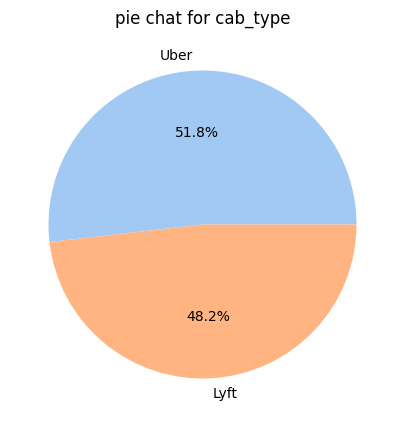

In [21]:
plt.figure(figsize=(5,5))
plt.pie(df['cab_type'].value_counts(),labels= df['cab_type'].value_counts().index,autopct='%.1f%%',colors=sns.color_palette('pastel'))
plt.title('pie chat for cab_type')
plt.show()

### 3. time_stamp

>The timestamps you provided appear to be in Unix timestamp (Epoch time) format, but in milliseconds. Unix timestamps represent the number of seconds (or milliseconds, in this case) that have passed since January 1, 1970 (the Unix epoch).

In [22]:
from datetime import datetime

### converting datetime into correct format

In [23]:
def datetime_conversion(x):
    readable_time = datetime.utcfromtimestamp(x / 1000).strftime('%Y-%m-%d %H:%M:%S')
    return readable_time

In [24]:
df_timestamp_old = df['time_stamp']
df['time_stamp'] = df['time_stamp'].apply(datetime_conversion)
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,2018-12-16 09:30:07,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,2018-11-27 02:00:23,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,2018-11-28 01:00:22,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,2018-11-30 04:53:02,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,2018-11-29 03:49:20,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [25]:
df['date'] = df['time_stamp'].dt.day
df['month'] = df['time_stamp'].dt.month
df['year'] = df['time_stamp'].dt.year
df['week_day'] = df['time_stamp'].dt.weekday
df['hour'] = df['time_stamp'].dt.hour

df.drop(columns=['time_stamp','year'],inplace=True)

df.head()

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,month,week_day,hour
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,16,12,6,9
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,27,11,1,2
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,28,11,2,1
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,30,11,4,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,29,11,3,3


In [26]:
df.columns

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date', 'month',
       'week_day', 'hour'],
      dtype='object')

### 4. destination & source

In [27]:
set(df['source'].unique())^ set(df['destination'].unique())

set()

In [28]:
df['destination'].dtype

dtype('O')

In [29]:
df['destination'].value_counts()

destination
Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: count, dtype: int64

In [30]:
df['source'].value_counts()

source
Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='destination'>

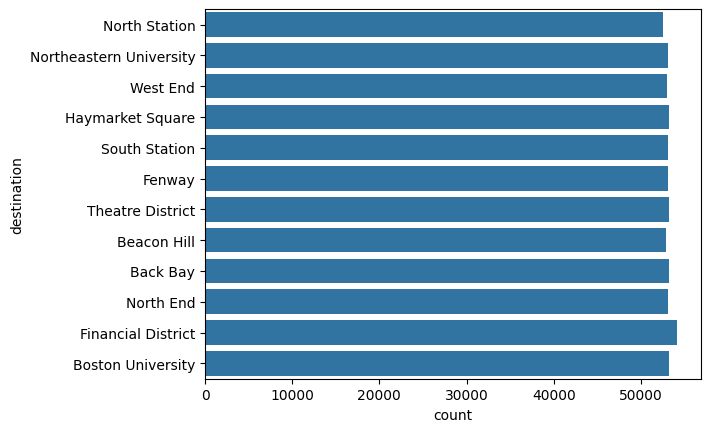

In [31]:
sns.countplot(df['destination'])


<Axes: xlabel='count', ylabel='source'>

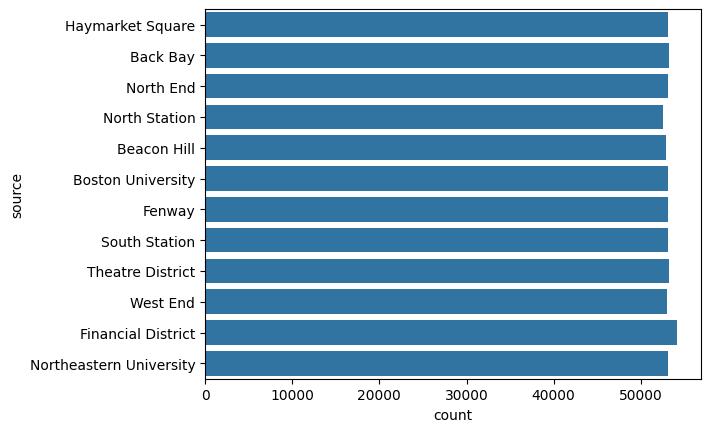

In [32]:
sns.countplot(df['source'])

In [33]:
pd.DataFrame(df[['source','destination']].value_counts().sort_values(ascending=False)).reset_index()

,source,destination,count
0,South Station,Financial District,9534
1,Financial District,South Station,9534
2,Back Bay,North End,9414
3,North End,Back Bay,9414
4,Fenway,West End,9360
...,...,...,...
67,West End,North End,8478
68,Haymarket Square,West End,8424
69,South Station,North Station,8424
70,West End,Haymarket Square,8424


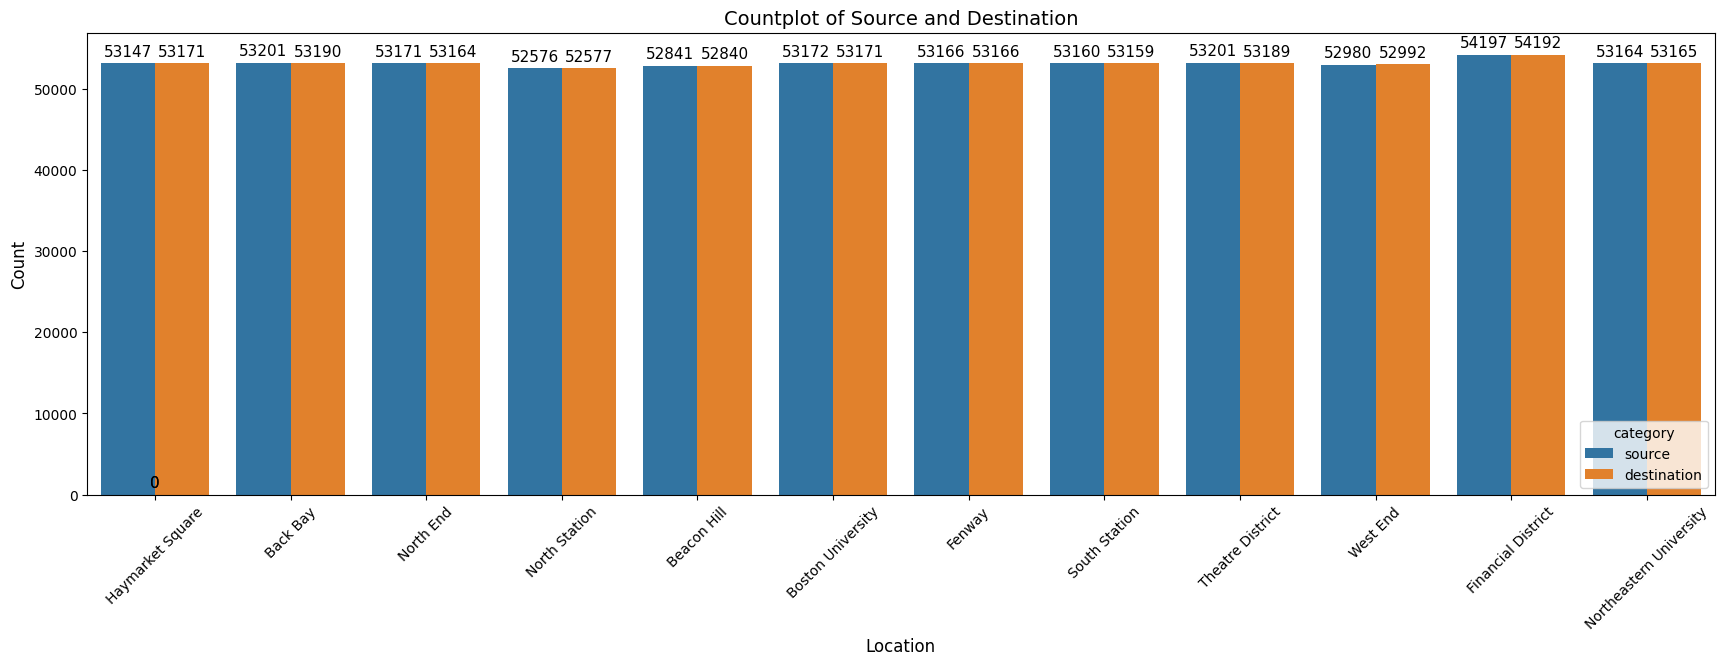

In [34]:
# Combine the 'source' and 'destination' columns into one DataFrame
df_melted = pd.melt(df, value_vars=['source', 'destination'], var_name='category', value_name='location')

# Create the countplot
plt.figure(figsize=(21, 6))
ax = sns.countplot(x='location', hue='category', data=df_melted)

# Add the value of each bar on top
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)


# Add titles and labels
plt.title('Countplot of Source and Destination', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### 5. price

In [35]:
df['price'].dtype

dtype('float64')

In [36]:
df['price'].describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [37]:
percentile_column(df['price'])

lower range : -31.5, 25 percetile : 9.0, 50th percentile = 13.5, 75th percentile : 22.5, higher range : 63.0


(np.float64(-31.5), np.float64(63.0))

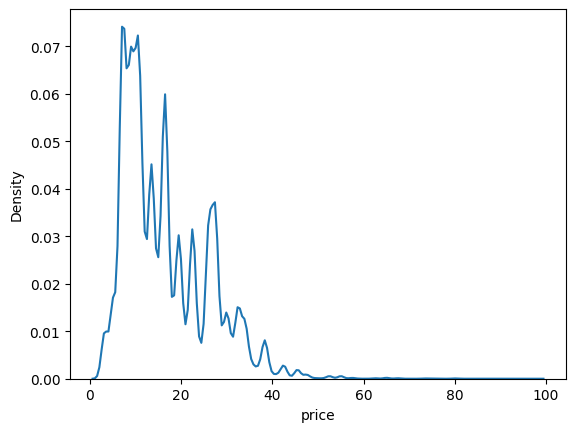

In [38]:
sns.kdeplot(df['price'])
plt.show()

### 6. surge_multiplier

In [39]:
df['surge_multiplier'].dtype

dtype('float64')

In [40]:
df['surge_multiplier'].describe()

count    637976.000000
mean          1.015068
std           0.095422
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: surge_multiplier, dtype: float64

In [41]:
df['surge_multiplier'].value_counts()

surge_multiplier
1.00    617001
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: count, dtype: int64

In [42]:
percentile_column(df['surge_multiplier'])

lower range : 1.0, 25 percetile : 1.0, 50th percentile = 1.0, 75th percentile : 1.0, higher range : 1.0


(np.float64(1.0), np.float64(1.0))

<Axes: xlabel='surge_multiplier', ylabel='Density'>

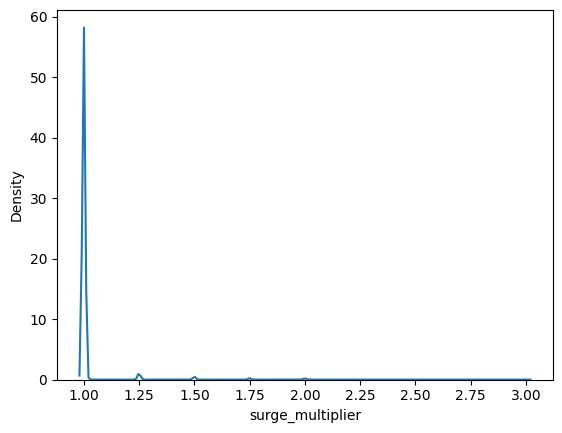

In [43]:
sns.kdeplot(df['surge_multiplier'])

<Axes: ylabel='price'>

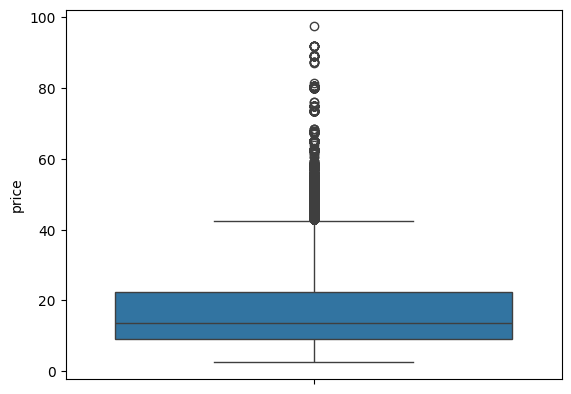

In [44]:
sns.boxplot(df['price'])

### 7. id

In [45]:
df['id'].dtype

dtype('O')

In [46]:
len(df['id']), df['id'].nunique()

(637976, 637976)

In [47]:
df['id'].value_counts()

id
e7fdc087-fe86-40a5-a3c3-3b2a8badcbda    1
424553bb-7174-41ea-aeb4-fe06d4f4b9d7    1
4bd23055-6827-41c6-b23b-3c491f24e74d    1
981a3613-77af-4620-a42a-0c0866077d1e    1
c2d88af2-d278-4bfd-a8d0-29ca77cc5512    1
                                       ..
009e9c53-074d-43cf-aef2-0fbc7a47ed3d    1
d859ec69-b3ff-4af8-9abd-441e31430c94    1
9043bf77-1d45-4a93-9520-a083e0277f16    1
8612d909-98b8-4454-a093-30bd48de0cb3    1
4f9fee41-fde3-4767-bbf1-a00e108701fb    1
Name: count, Length: 637976, dtype: int64

In [48]:
id_df = df['id'].str.split('-',expand=True)
id_df

,0,1,2,3,4
0,424553bb,7174,41ea,aeb4,fe06d4f4b9d7
1,4bd23055,6827,41c6,b23b,3c491f24e74d
2,981a3613,77af,4620,a42a,0c0866077d1e
3,c2d88af2,d278,4bfd,a8d0,29ca77cc5512
4,e0126e1f,8ca9,4f2e,82b3,50505a09db9a
...,...,...,...,...,...
637971,353e6566,b272,479e,a9c6,98bd6cb23f25
637972,616d3611,1820,450a,9845,a9ff304a4842
637973,633a3fc3,1f86,4b9e,9d48,2b7132112341
637974,727e5f07,a96b,4ad1,a2c7,9abc3ad55b4e


In [49]:
id_df[0].value_counts().reset_index()

,0,count
0,1c395b0e,2
1,a38456ea,2
2,cd818427,2
3,bc14c22a,2
4,233ee93f,2
...,...,...
637924,73510473,1
637925,871dc1be,1
637926,a96a15f9,1
637927,aa4e5808,1


In [50]:
id_df[1].value_counts().reset_index()

,1,count
0,57f6,25
1,4271,25
2,572d,24
3,c009,24
4,7efd,24
...,...,...
65528,596e,1
65529,7ddb,1
65530,f7cb,1
65531,b062,1


In [51]:
id_df[2].value_counts().reset_index()

,2,count
0,418c,212
1,49e2,200
2,4769,196
3,4846,196
4,46ac,195
...,...,...
4091,4da7,118
4092,464e,117
4093,4b7a,115
4094,4fb2,112


In [52]:
id_df[3].value_counts().reset_index()

,3,count
0,b81d,67
1,9db1,66
2,9c1b,66
3,a3bc,65
4,8c79,63
...,...,...
16379,815f,19
16380,a335,19
16381,baa9,19
16382,a138,19


In [53]:
id_df[4].value_counts().reset_index()

,4,count
0,3b2a8badcbda,1
1,fe06d4f4b9d7,1
2,3c491f24e74d,1
3,0c0866077d1e,1
4,29ca77cc5512,1
...,...,...
637971,0fbc7a47ed3d,1
637972,441e31430c94,1
637973,a083e0277f16,1
637974,30bd48de0cb3,1


### 8. product_id

In [54]:
df['product_id'].dtypes

dtype('O')

In [55]:
df['product_id'].value_counts()

product_id
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft                                    51235
lyft_premier                            51235
lyft_plus                               51235
lyft_luxsuv                             51235
lyft_lux                                51235
lyft_line                               51233
Name: count, dtype: int64

#### id and product id is somehow linked with cab type : uber and lyft

In [56]:
df[['id','product_id']]

,id,product_id
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line
1,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier
2,981a3613-77af-4620-a42a-0c0866077d1e,lyft
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus
...,...,...
637971,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d
637972,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
637973,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e
637974,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546


### 9. name

In [57]:
df['name'].dtype

dtype('O')

In [58]:
df['name'].value_counts()

name
WAV             55096
Black SUV       55096
UberXL          55096
Black           55095
UberX           55094
UberPool        55091
Lyft            51235
Lux             51235
Lyft XL         51235
Lux Black XL    51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

In [59]:
df[['name','product_id']]

,name,product_id
0,Shared,lyft_line
1,Lux,lyft_premier
2,Lyft,lyft
3,Lux Black XL,lyft_luxsuv
4,Lyft XL,lyft_plus
...,...,...
637971,WAV,9a0e7b09-b92b-4c41-9779-2ad22b4d779d
637972,UberXL,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
637973,UberX,55c66225-fbe7-4fd5-9072-eab1ece5e23e
637974,Black SUV,6d318bcc-22a3-4af6-bddd-b409bfce1546


### 10 . date , month

In [60]:
df.columns

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date', 'month',
       'week_day', 'hour'],
      dtype='object')

In [61]:
df['date'].value_counts()

date
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: count, dtype: int64

In [62]:
df['month'].value_counts()

month
12    374205
11    263771
Name: count, dtype: int64

In [63]:
df['week_day'].value_counts()

week_day
1    115091
0    114239
3     90718
6     84186
5     83012
4     82888
2     67842
Name: count, dtype: int64

In [64]:
df['hour'].value_counts()

hour
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: count, dtype: int64

## Bivariate analysis

### price vs distance

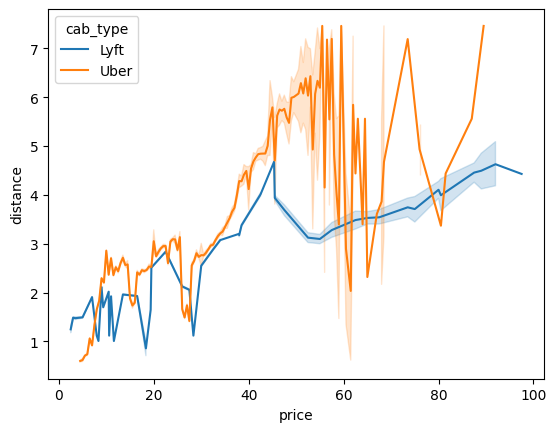

In [65]:
sns.lineplot(data=df,x='price',y='distance',hue='cab_type')
plt.show()

In [66]:
a

NameError: name 'a' is not defined

# Weather dataset

In [67]:
weather = pd.read_csv(r"D:\Project\data nyc fare data\weather.csv")
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [68]:
weather.shape

(6276, 8)

In [82]:
weather.dtypes

temp        float64
location     object
clouds      float64
pressure    float64
rain        float64
humidity    float64
wind        float64
dtype: object

In [71]:
(set(df_timestamp_old) & set(weather['time_stamp']))

set()

##### so none of the time_stamp between car_ride data and weather data matches. So dropping the column

In [73]:
weather.drop(columns='time_stamp',inplace=True)

In [74]:
weather.head()

,temp,location,clouds,pressure,rain,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,0.75,11.49


In [80]:
weather.describe()

,temp,clouds,pressure,rain,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,0.990000,18.180000


In [85]:
info_df = weather.groupby('location').agg('mean').reset_index()
info_df

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.056012,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.057097,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.054688,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.054863,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.061352,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.059593,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.058712,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.056542,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.054197,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.059537,0.755468,6.848948


In [83]:
df.columns

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date', 'month',
       'week_day', 'hour'],
      dtype='object')

In [90]:
new_df = df.merge(info_df,left_on='source',right_on='location')
new_df.head(6)

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,month,week_day,hour,location,temp,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,16,12,6,9,Haymarket Square,39.067897,0.676711,1008.445239,0.059593,0.764837,6.843193
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,27,11,1,2,Haymarket Square,39.067897,0.676711,1008.445239,0.059593,0.764837,6.843193
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,28,11,2,1,Haymarket Square,39.067897,0.676711,1008.445239,0.059593,0.764837,6.843193
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,30,11,4,4,Haymarket Square,39.067897,0.676711,1008.445239,0.059593,0.764837,6.843193
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,29,11,3,3,Haymarket Square,39.067897,0.676711,1008.445239,0.059593,0.764837,6.843193
5,0.44,Lyft,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black,17,12,0,18,Haymarket Square,39.067897,0.676711,1008.445239,0.059593,0.764837,6.843193


In [91]:
new_df.isnull().sum()

distance            0
cab_type            0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
date                0
month               0
week_day            0
hour                0
location            0
temp                0
clouds              0
pressure            0
rain                0
humidity            0
wind                0
dtype: int64